In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/sample_submission.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv


In [3]:
train = pd.read_csv('/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv')
test = pd.read_csv('/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv')

In [7]:
#train.isnull().sum()
#train.describe()
train.nunique()

id                                     206969
user_id                                186931
age                                        44
Gender                                      3
Date_Registered                          1823
Is_current_loyalty_program_member           2
loyalty_points_redeemed                     6
loyalty_tier                                4
Received_tier_discount_percentage           4
Received_card_discount_percentage         104
Received_coupon_discount_percentage       202
product_category                           20
Product_value                           11583
transaction_id                         206739
order_id                               187196
payment_method                             13
payment_datetime                       206682
purchased_datetime                     206682
purchase_medium                             2
final_payment                           32898
released_date                            1811
estimated_delivery_date           

In [5]:
#train.drop(columns=['Received_card_discount_percentage'])
#test.drop(columns=['Received_card_discount_percentage'])

,id,user_id,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_coupon_discount_percentage,...,payment_method,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number
0,0,****897735,30,F,2020-01-05,YES,4,4.0,10.0,0,...,mastercard_d,2020-01-06 07:17:59,2020-01-06 07:17:59,online,8192.0,2020-01-13,2020-01-15,2020-01-17,standard,***AKDCDBBOVK
1,1,****386832,57,O,2020-01-06,NO,4,NaN,NaN,3,...,cash,2020-01-08 10:17:58,2020-01-08 10:17:58,online,8035.0,2020-01-15,2020-01-20,2020-01-17,standard,***ZNIUIC3ZXT
2,2,****320205,35,O,2020-01-05,NO,0,NaN,NaN,5,...,mastercard_d,2020-01-10 03:44:20,2020-01-10 03:44:20,in-store,9896.0,2020-01-12,2020-01-18,2020-01-18,standard,***1G0TUWLUQO
3,3,****423059,36,M,2020-01-01,YES,4,4.0,10.0,1,...,grabpay,2020-01-12 23:37:09,2020-01-12 23:37:09,online,3419.0,2020-01-15,2020-01-22,2020-01-24,express,***HFH0DHDMVR
4,4,****453616,21,O,2020-01-06,YES,3,2.0,5.0,4,...,cash,2020-01-13 00:23:02,2020-01-13 00:23:02,in-store,8081.0,2020-01-15,2020-01-21,2020-01-23,express,***EM0MLB4NAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137966,137966,****565215,57,F,2024-12-24,YES,3,1.0,3.0,4,...,otc,2024-12-28 23:50:44,2024-12-28 23:50:44,online,2805.0,2024-12-29,2024-12-30,2025-01-01,standard,***YNJDKIJLK9
137967,137967,****023402,34,O,2024-12-20,YES,1,4.0,10.0,0,...,otc,2024-12-28 23:55:19,2024-12-28 23:55:19,in-store,224.0,2024-12-29,2025-01-02,2025-01-02,standard,***L3Y7UFTDQX
137968,137968,****101693,42,O,2023-07-15,YES,0,1.0,3.0,5,...,coinsph,2024-12-28 23:55:21,2024-12-28 23:55:21,in-store,2392.0,2025-01-03,2025-01-06,2025-01-08,express,***OLT1FFKXSG
137969,137969,****117354,51,O,2024-12-12,NO,2,NaN,NaN,2,...,amex,2024-12-28 23:58:40,2024-12-28 23:58:40,in-store,2345.0,2024-12-30,2025-01-02,2025-01-03,standard,***HDJFMBF0LX


In [4]:
train['loyalty_tier'].fillna(train['loyalty_tier'].mode()[0], inplace=True)
train['Received_tier_discount_percentage'].fillna(train['Received_tier_discount_percentage'].mode()[0], inplace=True)
#train['Received_card_discount_percentage'].fillna(train['Received_card_discount_percentage'].mode()[0], inplace=True)

test['loyalty_tier'].fillna(test['loyalty_tier'].mode()[0], inplace=True)
test['Received_tier_discount_percentage'].fillna(test['Received_tier_discount_percentage'].mode()[0], inplace=True)
#test['Received_card_discount_percentage'].fillna(test['Received_card_discount_percentage'].mode()[0], inplace=True)

In [5]:
train['Date_Registered']=pd.to_datetime(train['Date_Registered'])
train['payment_datetime']=pd.to_datetime(train['payment_datetime'])
train['purchased_datetime']=pd.to_datetime(train['purchased_datetime'])
train['released_date']=pd.to_datetime(train['released_date'])
train['estimated_delivery_date']=pd.to_datetime(train['estimated_delivery_date'])
train['received_date']=pd.to_datetime(train['received_date'])

test['Date_Registered']=pd.to_datetime(test['Date_Registered'])
test['payment_datetime']=pd.to_datetime(test['payment_datetime'])
test['purchased_datetime']=pd.to_datetime(test['purchased_datetime'])
test['released_date']=pd.to_datetime(test['released_date'])
test['estimated_delivery_date']=pd.to_datetime(test['estimated_delivery_date'])
test['received_date']=pd.to_datetime(test['received_date'])

train['id'] = train['id'].astype('Int32')
train['age'] = train['age'].astype('Int8')
train['loyalty_points_redeemed'] = train['loyalty_points_redeemed'].astype('Int8')

test['id'] = test['id'].astype('Int32')
test['age'] = test['age'].astype('Int8')
test['loyalty_points_redeemed'] = test['loyalty_points_redeemed'].astype('Int8')

train['loyalty_tier'] = train['loyalty_tier'].astype('Int8')
train['Received_tier_discount_percentage'] = train['Received_tier_discount_percentage'].astype('Int8')
train['Product_value'] = train['Product_value'].astype('Int32')

test['loyalty_tier'] = test['loyalty_tier'].astype('Int8')
test['Received_tier_discount_percentage'] = test['Received_tier_discount_percentage'].astype('Int8')
test['Product_value'] = test['Product_value'].astype('Int32')


In [6]:
new_df = pd.concat([train, test], axis =0)

In [7]:
new_df['shipping_method'] = pd.Categorical(new_df['shipping_method'],categories=['standard','express'],ordered=True)
new_df['shipping_method'] = new_df['shipping_method'].cat.codes

new_df['purchase_medium'] = pd.Categorical(new_df['purchase_medium'],categories=['online','in-store'],ordered=True)
new_df['purchase_medium'] = new_df['purchase_medium'].cat.codes


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
product_category_encoder = LabelEncoder()
payment_method_encoder = LabelEncoder()

# Apply label encoding to 'product_category'
new_df['product_category'] = product_category_encoder.fit_transform(new_df['product_category'])

# Apply label encoding to 'payment_method'
new_df['payment_method'] = payment_method_encoder.fit_transform(new_df['payment_method'])

# Check the result
#print(new_df[['product_category', 'payment_method']])

In [9]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(train, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(train[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = train.index
    train = pd.concat([train, encoded_columns], axis=1)
    train = train.drop(columns=[column])
    return train

columns_to_encode = ['Is_current_loyalty_program_member','Gender']

for col in columns_to_encode:
    new_df = one_hot_encode_and_add(new_df, col)

In [10]:
#adding new features
from datetime import datetime

new_df['registration_year'] = new_df['Date_Registered'].dt.year
new_df['registration_month'] = new_df['Date_Registered'].dt.month
new_df['registration_day_of_week'] = new_df['Date_Registered'].dt.dayofweek

new_df['days_to_payment'] = (new_df['payment_datetime'] - new_df['Date_Registered']).dt.days
new_df['days_to_purchase'] = (new_df['purchased_datetime'] - new_df['payment_datetime']).dt.days
new_df['days_to_release'] = (new_df['released_date'] - new_df['purchased_datetime']).dt.days
new_df['days_to_estimated_delivery'] = (new_df['estimated_delivery_date'] - new_df['released_date']).dt.days
new_df['days_to_actual_delivery'] = (new_df['received_date'] - new_df['released_date']).dt.days
new_df['delivery_delay'] = (new_df['received_date'] - new_df['estimated_delivery_date']).dt.days

new_df['registration_quarter'] = new_df['Date_Registered'].dt.quarter
new_df['purchase_hour'] = new_df['purchased_datetime'].dt.hour
new_df['purchase_is_weekend'] = new_df['purchased_datetime'].dt.dayofweek.isin([5, 6]).astype(int)

new_df['account_age_days'] = (datetime.now() - new_df['Date_Registered']).dt.days
new_df['inactive_period_days'] = (new_df['received_date'] - new_df['purchased_datetime']).dt.days

new_df['on_time_payment'] = (new_df['days_to_payment'] <= 7).astype(int)
new_df['fast_delivery'] = (new_df['days_to_actual_delivery'] <= new_df['days_to_estimated_delivery']).astype(int)

# ----------------------------------------------------
new_df['user_transaction_count'] = new_df.groupby('user_id')['transaction_id'].transform('count')
new_df['user_order_count'] = new_df.groupby('user_id')['order_id'].transform('count')
new_df['user_tracking_num_count'] = new_df.groupby('user_id')['tracking_number'].transform('count')
new_df['order_value_per_transaction'] = new_df['final_payment'] / new_df['user_order_count']


In [11]:
new_df = new_df.drop(columns=['user_id','transaction_id','order_id','tracking_number'])
new_df= new_df.drop(columns=['Received_card_discount_percentage'])


In [12]:
train = new_df.dropna(subset=['customer_experience'])
test = new_df[new_df['customer_experience'].isna()]

test = test.drop(columns=['customer_experience'])

In [27]:
test

,id,age,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,Product_value,...,purchase_hour,purchase_is_weekend,account_age_days,inactive_period_days,on_time_payment,fast_delivery,user_transaction_count,user_order_count,user_tracking_num_count,order_value_per_transaction
0,0,30,2020-01-05,4,4,10,NaN,0,17,8038,...,7,0,1834,10,1,0,2,2,2,4096.0
1,1,57,2020-01-06,4,2,5,NaN,3,14,7803,...,10,0,1833,8,1,1,2,2,2,4017.5
2,2,35,2020-01-05,0,2,5,NaN,5,9,9663,...,3,0,1834,7,1,1,2,2,2,4948.0
3,3,36,2020-01-01,4,4,10,NaN,1,15,3151,...,23,1,1838,11,0,0,1,1,1,3419.0
4,4,21,2020-01-06,3,2,5,NaN,4,18,8007,...,0,0,1833,9,1,0,1,1,1,8081.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137966,137966,57,2024-12-24,3,1,3,NaN,4,18,2574,...,23,1,19,3,1,0,1,1,1,2805.0
137967,137967,34,2024-12-20,1,4,10,NaN,0,15,165,...,23,1,23,4,0,1,1,1,1,224.0
137968,137968,42,2023-07-15,0,1,3,NaN,5,1,2128,...,23,1,547,10,0,0,2,2,2,1196.0
137969,137969,51,2024-12-12,2,2,5,5.0,2,2,2195,...,23,1,31,5,0,0,1,1,1,2345.0


In [13]:
train['customer_experience'] = train['customer_experience'].replace('bad',0)
train['customer_experience'] = train['customer_experience'].replace('neutral',1)
train['customer_experience'] = train['customer_experience'].replace('good',2)

<ipython-input-13-a19c12a3c14b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['customer_experience'] = train['customer_experience'].replace('bad',0)
<ipython-input-13-a19c12a3c14b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['customer_experience'] = train['customer_experience'].replace('neutral',1)
<ipython-input-13-a19c12a3c14b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [13]:
train.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Index: 206969 entries, 0 to 206968
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   id                                     206969 non-null  Int32         
 1   age                                    206969 non-null  Int8          
 2   Date_Registered                        206969 non-null  datetime64[ns]
 3   loyalty_points_redeemed                206969 non-null  Int8          
 4   loyalty_tier                           206969 non-null  Int8          
 5   Received_tier_discount_percentage      206969 non-null  Int8          
 6   Received_coupon_discount_percentage    206969 non-null  int64         
 7   product_category                       206969 non-null  int64         
 8   Product_value                          206969 non-null  Int32         
 9   payment_method                         206969 non-nul

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    X = X.dropna()  
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


X = train.drop(columns=['customer_experience','id','Date_Registered','payment_datetime','purchased_datetime','released_date','estimated_delivery_date','received_date'], axis=1)  
y = train['customer_experience']

mi_scores = make_mi_scores(X, y)

print(mi_scores)


inactive_period_days                     0.060567
days_to_payment                          0.045050
days_to_actual_delivery                  0.031472
Received_coupon_discount_percentage      0.027948
on_time_payment                          0.024382
days_to_purchase                         0.024372
days_to_estimated_delivery               0.020376
fast_delivery                            0.018972
days_to_release                          0.018806
registration_year                        0.014844
delivery_delay                           0.013692
purchase_medium                          0.012440
purchase_is_weekend                      0.011787
shipping_method                          0.011581
user_transaction_count                   0.011393
user_order_count                         0.011393
user_tracking_num_count                  0.011393
Received_tier_discount_percentage        0.011114
loyalty_tier                             0.010516
age                                      0.009576


In [14]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['customer_experience','Date_Registered','payment_datetime','purchased_datetime','released_date','estimated_delivery_date','received_date','Is_current_loyalty_program_member_NO','Is_current_loyalty_program_member_YES','purchase_hour','product_category','payment_method','registration_month','Gender_F','Gender_O','Gender_M'], axis=1)
y = train['customer_experience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

def predict(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    labels = ['bad', 'neutral','good']
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.44      0.46     13757
           1       0.44      0.17      0.24      9477
           2       0.53      0.72      0.61     18160

    accuracy                           0.50     41394
   macro avg       0.48      0.44      0.44     41394
weighted avg       0.49      0.50      0.47     41394



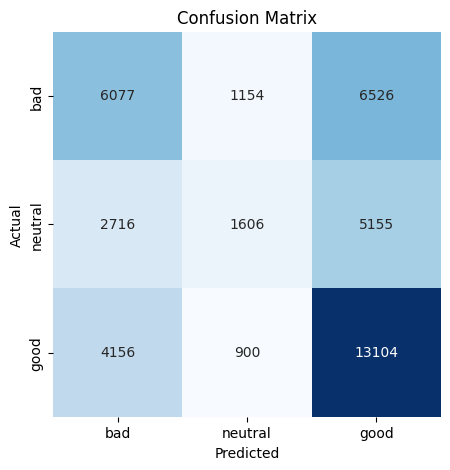

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)

predict(X_train, y_train, X_test, y_test, tree_model)


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46     13757
           1       0.40      0.27      0.32      9477
           2       0.55      0.65      0.60     18160

    accuracy                           0.50     41394
   macro avg       0.47      0.46      0.46     41394
weighted avg       0.49      0.50      0.49     41394



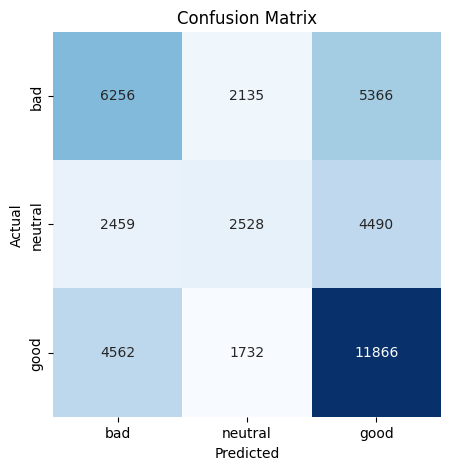

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=42)

predict(X_train, y_train, X_test, y_test, rf_model)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.46      0.47     13757
           1       0.48      0.36      0.41      9477
           2       0.56      0.66      0.61     18160

    accuracy                           0.52     41394
   macro avg       0.51      0.49      0.50     41394
weighted avg       0.52      0.52      0.52     41394



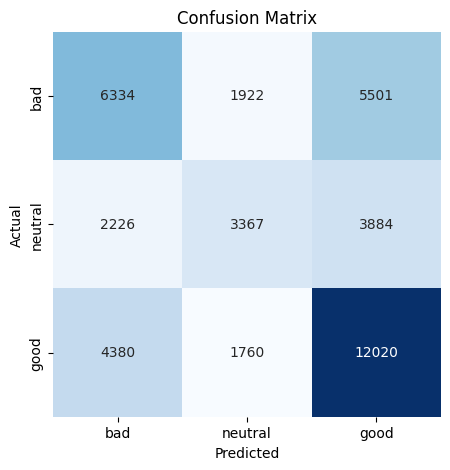

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=42)

predict(X_train, y_train, X_test, y_test, gb_model)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.49     13757
           1       0.52      0.43      0.47      9477
           2       0.57      0.64      0.61     18160

    accuracy                           0.54     41394
   macro avg       0.53      0.52      0.52     41394
weighted avg       0.54      0.54      0.53     41394



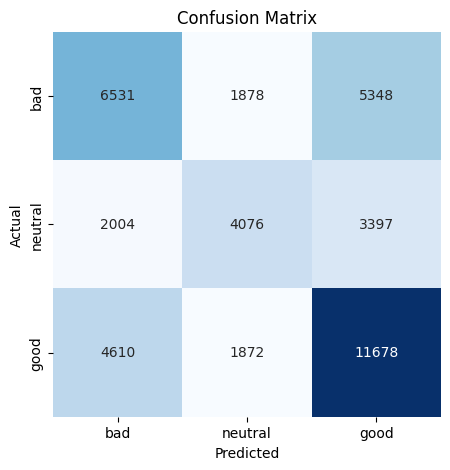

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=5, random_state=42)

predict(X_train, y_train, X_test, y_test, gb_model)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49     13757
           1       0.55      0.48      0.51      9477
           2       0.58      0.63      0.60     18160

    accuracy                           0.55     41394
   macro avg       0.54      0.53      0.54     41394
weighted avg       0.55      0.55      0.55     41394



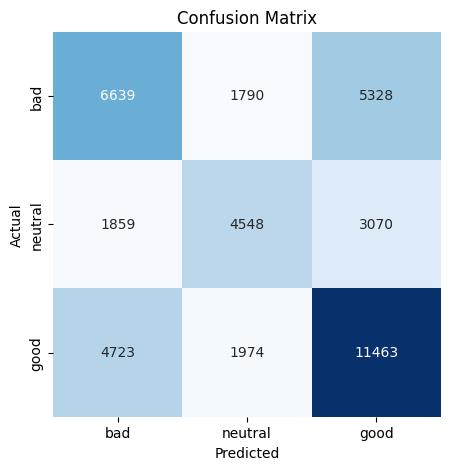

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,max_depth=5, random_state=42)

predict(X_train, y_train, X_test, y_test, gb_model)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.48     13757
           1       0.51      0.40      0.45      9477
           2       0.57      0.65      0.61     18160

    accuracy                           0.53     41394
   macro avg       0.52      0.51      0.51     41394
weighted avg       0.53      0.53      0.53     41394



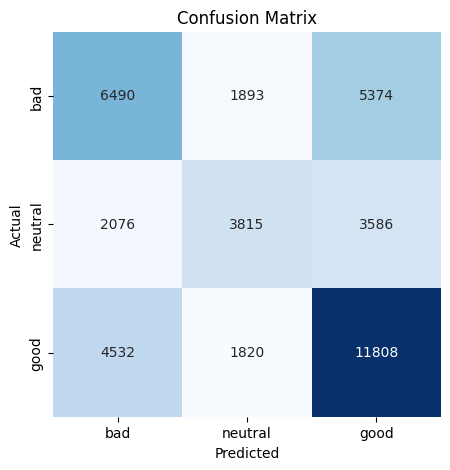

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05,max_depth=5, random_state=42)

predict(X_train, y_train, X_test, y_test, gb_model)


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50     13757
           1       0.56      0.52      0.54      9477
           2       0.58      0.62      0.60     18160

    accuracy                           0.55     41394
   macro avg       0.55      0.54      0.55     41394
weighted avg       0.55      0.55      0.55     41394



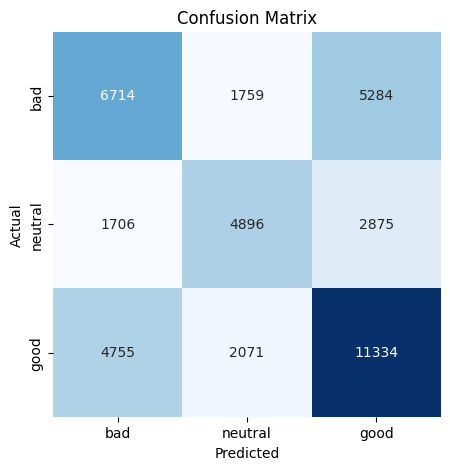

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,max_depth=5, random_state=42)

predict(X_train, y_train, X_test, y_test, gb_model)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.50     13757
           1       0.59      0.53      0.56      9477
           2       0.57      0.62      0.60     18160

    accuracy                           0.56     41394
   macro avg       0.56      0.55      0.55     41394
weighted avg       0.55      0.56      0.55     41394



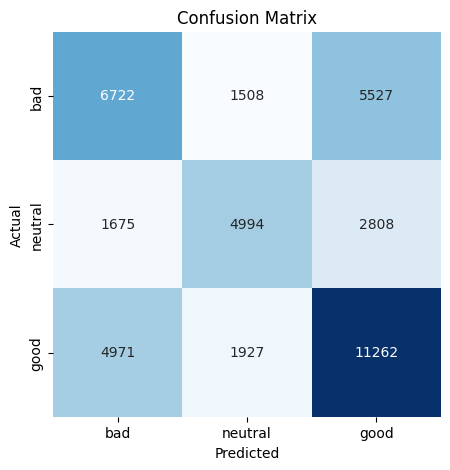

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,max_depth=10, random_state=42)

predict(X_train, y_train, X_test, y_test, gb_model)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
#final_model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
final_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,max_depth=10, random_state=42)
final_model.fit(X, y)

new_test = test.drop(columns=['Date_Registered','payment_datetime','purchased_datetime','released_date','estimated_delivery_date','received_date','Is_current_loyalty_program_member_NO','Is_current_loyalty_program_member_YES','purchase_hour','product_category','payment_method','registration_month','Gender_F','Gender_O','Gender_M'], axis=1)  


In [18]:
predictions = final_model.predict(new_test)
predictions

array([2, 1, 1, ..., 1, 2, 2])

In [19]:
submission = pd.read_csv('/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/sample_submission.csv')
submission

,id,customer_experience
0,0,good
1,1,good
2,2,good
3,3,good
4,4,good
...,...,...
137966,137966,good
137967,137967,good
137968,137968,good
137969,137969,good


In [20]:
submission['customer_experience'] = predictions
submission

,id,customer_experience
0,0,2
1,1,1
2,2,1
3,3,1
4,4,2
...,...,...
137966,137966,0
137967,137967,0
137968,137968,1
137969,137969,2


In [21]:
submission['customer_experience'] = submission['customer_experience'].replace(0,'bad')
submission['customer_experience'] = submission['customer_experience'].replace(1,'neutral')
submission['customer_experience'] = submission['customer_experience'].replace(2,'good')

In [22]:
submission

,id,customer_experience
0,0,good
1,1,neutral
2,2,neutral
3,3,neutral
4,4,good
...,...,...
137966,137966,bad
137967,137967,bad
137968,137968,neutral
137969,137969,good


In [23]:
submission.to_csv("submission22.csv", index=False)